In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import laplace, norm
import numpy as np

In [162]:
#Сгенерируем выборку размера 1000 из распределения Парето
laplace_dist = laplace.rvs(size=1000)

In [163]:
#C помощью scipy получим плотность распределения Лапласа
x = np.linspace(laplace.ppf(0.01), laplace.ppf(0.99), 1000)
laplace_theoretical = laplace.pdf(x)

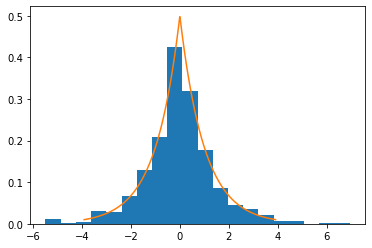

In [164]:
#Строим графики полученной выборки и теоретической плотности распределения
plt.hist(laplace_dist, bins=20, density=True)
plt.plot(x, laplace_theoretical)
plt.show()

In [203]:
#сделаем 1000 выборок по 5, 10, 50 элементов из распределения
sample_1 = laplace.rvs(size=[1000, 5])
sample_2 = laplace.rvs(size=[1000, 10])
sample_3 = laplace.rvs(size=[1000, 50])

In [204]:
#проверим корректность на первой выборке из каждой 1000
sample_1[0], sample_2[0], sample_3[0]

(array([ 0.34098433, -0.26558941, -0.34223336,  0.02334119, -1.54764676]),
 array([-1.49640516, -1.06694378,  0.10537662, -0.34003176,  1.95904255,
        -0.17787625,  2.68956184,  1.19408653, -0.20269378,  0.10814136]),
 array([-8.86157627e-01,  2.21084649e-01, -2.13184685e+00,  4.95534923e-01,
         1.51217863e+00,  1.08699154e+00,  4.13787939e-01, -4.63883863e-01,
        -9.02424637e-01, -3.84372656e-02,  4.26088821e-01,  9.07940175e-02,
         7.48192619e-01, -1.53287678e+00,  9.52613290e-01,  7.25517203e-01,
        -2.82960446e+00,  2.72343518e-03, -3.27072816e-01,  2.41444524e+00,
         8.25089165e-01, -4.73205371e-01,  7.28290058e-01, -6.11789797e-01,
         9.44941239e-01,  4.42000354e-01,  4.46670408e-01,  2.87510549e-01,
        -6.92503311e-01, -2.47824189e-01,  4.36218142e-01, -1.14798055e+00,
         1.66453626e+00, -3.14219337e+00, -3.71478460e-01, -1.88001990e-01,
         3.57676866e-01, -1.49485316e-01,  9.24367475e-03, -3.33377383e+00,
         8.330657

In [205]:
#посчитаем выборочные средние
sample_1_mean = [x.mean() for x in sample_1]
sample_2_mean = [x.mean() for x in sample_2]
sample_3_mean = [x.mean() for x in sample_3]

In [228]:
#создадим нормальные распределения, которые характеризуют выборочные средние
mu = 0
std_1 = np.sqrt(1.0 / 5.0)
std_2 = np.sqrt(1.0 / 10.0)
std_3 = np.sqrt(1.0 / 50.0)

x_1 = np.linspace(mu - 3 * std_1, mu + 3 * std_1, 1000)
x_2 = np.linspace(mu - 3 * std_2, mu + 3 * std_2, 1000)
x_3 = np.linspace(mu - 3 * std_3, mu + 3 * std_3, 1000)

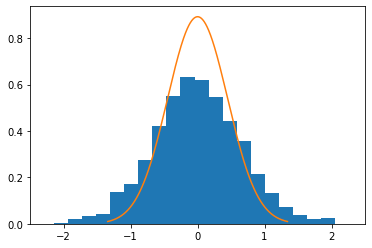

In [244]:
#распределение выборочных средних при n=5
plt.hist(sample_1_mean, bins=20, density=True)
plt.xlim(-2.5, 2.5)
plt.plot(x_1, norm.pdf(x_1, mu, std_1))
plt.show()

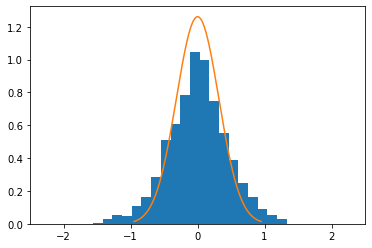

In [243]:
#распределение выборочных средний при n=10
plt.hist(sample_2_mean, bins=20, density=True)
plt.plot(x_2, norm.pdf(x_2, mu, std_2))
plt.xlim(-2.5, 2.5)
plt.show()

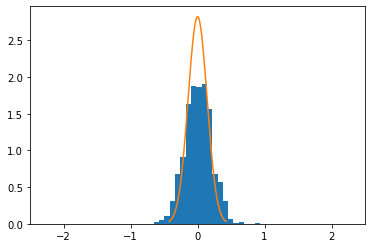

In [242]:
#распределение выборочных средних при n=50
plt.hist(sample_3_mean, bins=20, density=True)
plt.plot(x_3, norm.pdf(x_3, mu, std_3))
plt.xlim(-2.5, 2.5)
plt.show()

Из данных графиков видно, что при увеличении параметра n дисперсия выборочных средних снижается. Распределение выборочных средних достаточно хорошо описывается нормальным распределением при большом значении параметра n (>30), о чем и говорит ЦПТ.